# Little Drummers Statistical Analysis

Here we collate the frequency data from the drumming videos. We load the data from the spreadsheet `LittleDrummers_FormattedDataSheet.xlsx`. 

The worksheet `ManualCoding` contains one row per participant and includes the participant ids, the condition they are in, human rating of whether they drumming, whether this was visible on camera and which hand or hands they used. 

The worksheet `Fourier.All` contains one row per video and includes the participant ids, the trial number (SMT1, 1, 2, 3, 4, SMT2), and for each hand - the peak frequency from the fourier analysis for that video and power at several different target frequencies (400,500,600,700).

We combine these to find group level performance. 

## First import libraries and data

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

#turn on debugging
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
%pdb on

Automatic pdb calling has been turned ON


In [37]:
excelfile = "C:\\Users\\cas\\OneDrive - Goldsmiths College\\Projects\\Little Drummers\\LittleDrummers_FormattedDataSheet.xlsx"

manualcoding = pd.read_excel(excelfile, sheet_name = "ManualCoding",  header=[0,1])

#fourier = pd.read_excel(excelfile, sheet_name = "Fourier.All.0.5Hzcuttoff",  header=[0,1])
fourier = pd.read_excel(excelfile, sheet_name = "Fourier.All.1.0Hzcuttoff",  header=[0,1])

nchildren = len(manualcoding)

print("ManualCoding sheet contains {0} rows.".format(nchildren))

print("Fourier data sheet contains {0} rows.".format(len(fourier)))

ManualCoding sheet contains 97 rows.
Fourier data sheet contains 466 rows.


## Start analysis

For each trail we need to know the target inter stimulus interval (ISI) for each trial. For children in condition 0 the trial order was (400, 600, 500, 700), in condition 1 the order was (700,500,600,400). Then we need to know 

In [38]:
#Create a look up arrays to find out the ISI for each trial + condition
orders =  [[400, 600, 500, 700],[700,500,600,400]]
#And a data structure to do the reverse find Trial from targetISI and condition 
trials = {400: {0:"Trial1", 1:"Trial4"},
          500: {0:"Trial3", 1:"Trial2"},
          600: {0:"Trial2", 1:"Trial3"},
          700: {0:"Trial4", 1:"Trial1"},
          "SMT1": {0:"SMT1", 1:"SMT1"}, #SMT trials not affected by condition
          "SMT2": {0:"SMT2", 1:"SMT2"}
         }

#see if it works as expected
print(trials[500][0])
print(orders[1][2])

Trial3
600


In [133]:
def TrialInfo(manualcodingsheet, childID, targetISI):
    #can we find this child?
    child = manualcoding[manualcoding["ChildID","ChildID"] == childID]
    if len(child) != 1:
        raise ValueError("There were " + str(len(child)) + " entries found for ID = " + childID + " (Expecting 1.)")

    rowidx = child.index[0]
    trial = lambda: None   #Standard hack to create an object with dynamic properties
    
    trial.ID = child.at[rowidx, ("ChildID","ChildID")]
    trial.respcompleted = child.at[rowidx, ("response_completed","response_completed")]
    trial.withdrawn = child.at[rowidx, ("response_withdrawn","response_withdrawn")]
    trial.condition = child.at[rowidx, ("response_condition","response_condition")]
    
    trial.name = trials[targetISI][condition]
    trial.ISI = targetISI

    trial.cleaned = child.at[rowidx, (trial.name,"Data cleaned")]
    trial.attempted = child.at[rowidx, (trial.name,"Trial Attempted")]
    trial.complete = child.at[rowidx, (trial.name,"Trial Complete")]
    trial.inView = child.at[rowidx, (trial.name,"In View")]
    trial.infantDrum = child.at[rowidx, (trial.name,"Infant Drum")]
    trial.rightHand = child.at[rowidx, (trial.name,"Right Hand")]
    trial.leftHand = child.at[rowidx, (trial.name,"Left Hand")]

    return trial

In [130]:
cid = '1c82e9e'


child = manualcoding[manualcoding["ChildID","ChildID"] == cid]
print((child.index.tolist())[0])
rownum = child.index[0]

manualcoding.at[rownum, ("ChildID","ChildID")]

5


'1c82e9e'

In [144]:
trial = TrialInfo(manualcoding, "1fa339b", 700)
print(trial.ID,trial.respcompleted)
print(trial.inView )


if trial.respcompleted and not trial.withdrawn and trial.cleaned: #is this valid data?
    if trial.attempted and trial.inView and trial.infantDrum: #was there any (visible) drumming?
        print(trial.leftHand,trial.rightHand)

1fa339b True
1.0
0.0 1.0


<function TrialInfo.<locals>.<lambda> at 0x0000018BE3116820>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE3116940>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31168B0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE3116820>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE304A1F0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE313C670>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE313C790>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE313C8B0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE3116820>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE304A1F0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31164C0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31168B0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1B12430>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31164C0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE304A1F0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31164C0>
<function TrialInfo.<loc

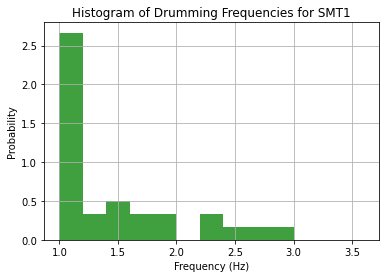

<function TrialInfo.<locals>.<lambda> at 0x0000018BE31164C0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE318CE50>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31AD700>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31AD280>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31AD160>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31ADDC0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE318CE50>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE313C8B0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31AD160>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31AD040>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31AD0D0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31AD1F0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE318CF70>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31AD1F0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31AD310>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE313C8B0>
<function TrialInfo.<loc

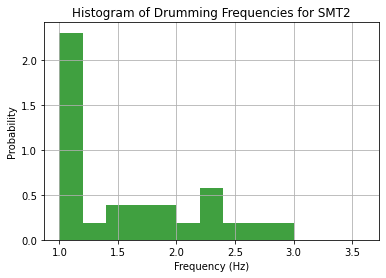

<function TrialInfo.<locals>.<lambda> at 0x0000018BE31AD310>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32224C0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE30A44C0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31CEB80>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE322D0D0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE322D160>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE318CE50>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31CEB80>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE318CEE0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31CEB80>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE30A44C0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31CEB80>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE30A44C0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31CEB80>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE318CE50>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE31CEB80>
<function TrialInfo.<loc

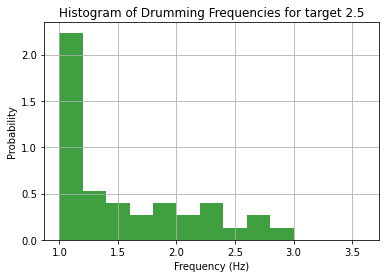

<function TrialInfo.<locals>.<lambda> at 0x0000018BE3235550>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE327F820>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32A3310>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32A31F0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32A30D0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32A34C0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE327F790>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE327F820>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE327F700>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE327F820>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE327F700>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE327F820>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE3222160>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE327F790>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE327F820>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE3222160>
<function TrialInfo.<loc

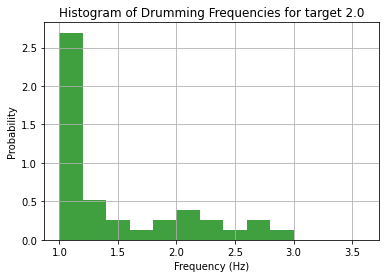

<function TrialInfo.<locals>.<lambda> at 0x0000018BE32A3310>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32FACA0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE331C310>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE331C1F0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32FACA0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32A3310>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32FACA0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE327F430>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32FAC10>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32FA790>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32A3310>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32FAC10>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE327F430>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32FA790>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32FACA0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE327F430>
<function TrialInfo.<loc

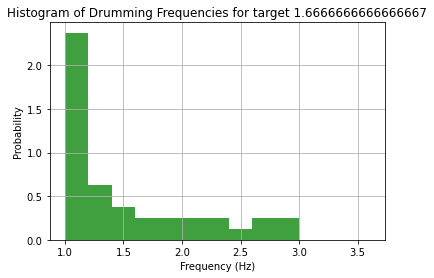

<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C58F70>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C58B80>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE32FAEE0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C58F70>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C58CA0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C58B80>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C58F70>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C58CA0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C58B80>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C58F70>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C58CA0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C589D0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C58B80>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C58AF0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C589D0>
<function TrialInfo.<locals>.<lambda> at 0x0000018BE1C58CA0>
<function TrialInfo.<loc

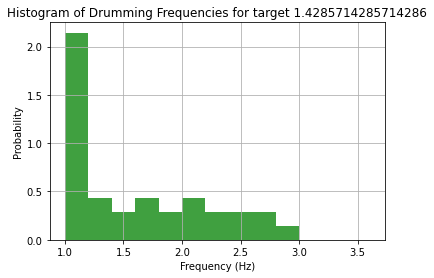

In [140]:


for targetISI in ["SMT1"]  #,"SMT2",400,500,600,700]:
    fs = []
    for child in range(nchildren):
        childID = manualcoding.loc[child, ("ChildID","ChildID")]
        trial = TrialInfo(manualcoding, childID,targetISI)


        if trial.respcompleted and not trial.withdrawn and trial.cleaned: #is this valid data?
            if trial.attempted and trial.inView and trial.infantDrum: #was there any (visible) drumming?
                #select all the fourier data for this child
                freqpower = fourier[fourier['ChildID','ChildID'] == childID]
                if trial.leftHand and trial.rightHand:
                    l = float(freqpower[freqpower['TrialID','TrialID'] == whichtrial]["Left","peakpower"])
                    r = float(freqpower[freqpower['TrialID','TrialID'] == whichtrial]["Right","peakpower"])
                    #select the hand with greatest power
                    side = ("Right" if r > l else "Left")
                    f = float(freqpower[freqpower['TrialID','TrialID'] == whichtrial][side,"peakfreq"])
                elif trial.rightHand:
                    f = float(freqpower[freqpower['TrialID','TrialID'] == whichtrial]["Right","peakfreq"])
                elif trial.leftHand:
                    f = float(freqpower[freqpower['TrialID','TrialID'] == whichtrial]["Left","peakfreq"])
                else:
                    f = None
                #print(childID, condition, whichtrial,datacleaned, trialAttempted,trialComplete,inView,infantDrum,rightHand,leftHand)
                #print(f)
                fs.append(f)

    plotHistograms(targetISI,fs)

In [50]:
whichtrial


'Trial1'

In [47]:
def plotHistograms(targetISI,fs):
    # the histogram of the data
    binList = np.linspace(1.00,3.6,14)
    n, bins, patches = plt.hist(fs, bins = binList , density=True, facecolor='g', alpha=0.75)

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Probability')
    if isinstance(targetISI, (str)):
        plt.title('Histogram of Drumming Frequencies for ' + targetISI)
    else:
        plt.title('Histogram of Drumming Frequencies for target {}'.format(1000/targetISI))

    #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    #plt.xlim(40, 160)
    #plt.ylim(0, 0.03)
    plt.grid(True)
    plt.show()

In [46]:
binList = np.linspace(1.00,3.6,14)
print(binList)

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6]


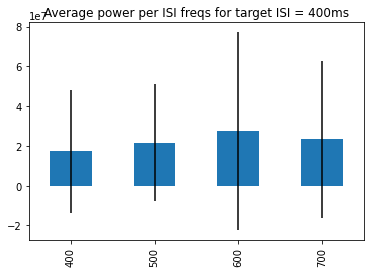

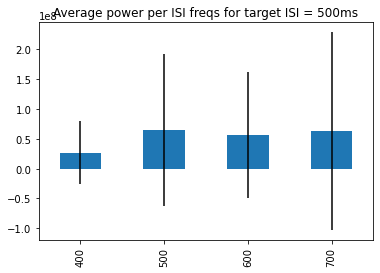

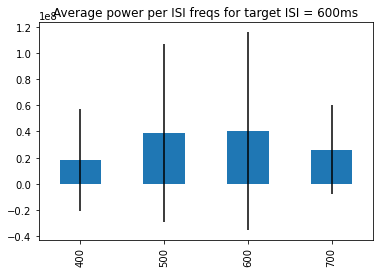

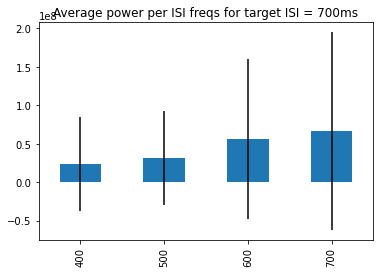

In [57]:

for targetISI in [400,500,600,700]:
    
    #data structure to store power found in target bands
    powerinband = pd.DataFrame(columns = ("ID", "400","500","600","700"))
    for child in range(nchildren):
        onerow = {}
        childID = manualcoding.loc[child, ("ChildID","ChildID")]
        onerow["ID"] = childID
        completed = manualcoding.loc[child, ("response_completed","response_completed")]
        withdrawn = manualcoding.loc[child, ("response_withdrawn","response_withdrawn")]
        condition = manualcoding.loc[child, ("response_condition","response_condition")]
        
        whichtrial = trials[targetISI][condition]

        datacleaned = manualcoding.loc[child, (whichtrial,"Data cleaned")]
        trialAttempted = manualcoding.loc[child, (whichtrial,"Trial Attempted")]
        trialComplete = manualcoding.loc[child, (whichtrial,"Trial Complete")]
        inView = manualcoding.loc[child, (whichtrial,"In View")]
        infantDrum = manualcoding.loc[child, (whichtrial,"Infant Drum")]
        rightHand = manualcoding.loc[child, (whichtrial,"Right Hand")]
        leftHand = manualcoding.loc[child, (whichtrial,"Left Hand")]

        if completed and not withdrawn and datacleaned: #is this valid data?
            if trialAttempted and inView and infantDrum: #was there any (visible) drumming?
                #select all the fourier data for this child
                freqpower = fourier[fourier['ChildID','ChildID'] == childID]
                
                for frequencyBand in ["400","500","600","700"]:
                    if leftHand and rightHand:
                        l = float(freqpower[freqpower['TrialID','TrialID'] == whichtrial]["Left",frequencyBand])
                        r = float(freqpower[freqpower['TrialID','TrialID'] == whichtrial]["Right",frequencyBand])
                        p = max(l,r)
                    elif rightHand:
                        p = float(freqpower[freqpower['TrialID','TrialID'] == whichtrial]["Right",frequencyBand])
                    elif leftHand:
                        p = float(freqpower[freqpower['TrialID','TrialID'] == whichtrial]["Left",frequencyBand])
                    else:
                        p = None
                    onerow[frequencyBand] = p
                #print(childID, condition, whichtrial,datacleaned, trialAttempted,trialComplete,inView,infantDrum,rightHand,leftHand)
                #print(onerow)
                
                powerinband = powerinband.append(onerow, ignore_index=True)
    
    #RelativePowerGraph(str(targetISI),powerinband)
    AbsolutePowerGraph(str(targetISI),powerinband)


<AxesSubplot:title={'center':'Mean Power per target frequency'}>

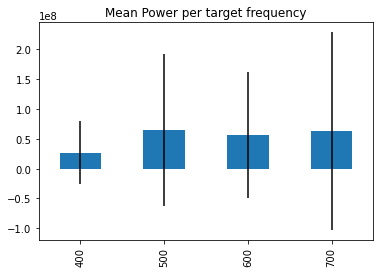

In [25]:
means1 = powerinband.mean(axis =0, numeric_only=True)

#or 
means2 = powerinband.agg([np.mean, np.std])


means2.T.plot(kind = "bar", y = "mean", legend = False,
            title = "Mean Power per target frequency", yerr = "std")

In [56]:
#
def AbsolutePowerGraph(targetISI,powerinband):
    means3 = powerinband.agg([np.mean, np.std])
    means3.T.plot(kind = "bar", y = "mean", legend = False,
                title = "Average power per ISI freqs for target ISI = " + targetISI + "ms", yerr = "std")
    
def RelativePowerGraph(targetISI,powerinband):
    normalise = powerinband.iloc[:, 1:5]
    normalise = normalise.div(normalise.sum(axis=1), axis=0)

    means3 = normalise.agg([np.mean, np.std])
    means3.T.plot(kind = "bar", y = "mean", legend = False,
                title = "Relative power per ISI freqs for target ISI = " + targetISI + "ms", yerr = "std")

In [8]:
means = powerinband.agg([np.mean, np.std])
normalise
print(means.T)

             mean           std
400  1.728462e+07  3.093190e+07
500  2.159918e+07  2.933664e+07
600  2.748431e+07  4.970567e+07
700  2.333504e+07  3.937574e+07


<AxesSubplot:title={'center':'Average Prices'}>

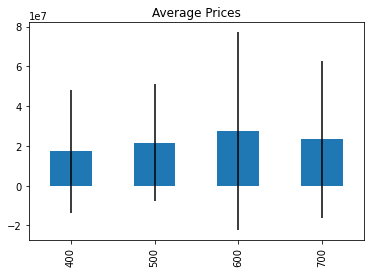

In [12]:
#powerinband.mean(axis =0, numeric_only=True)


#qual = qual['insert']
#qual.plot(kind = "barh", y = "mean", legend = False,
#          xerr = "std", title = "Quality", color='green')


In [52]:
powerinband

,ID,400,500,600,700
0,111f7a5,2.796105e+07,9.617272e+07,1.026306e+08,2.536893e+08
1,1fa339b,2.130440e+07,2.755770e+07,4.544553e+07,5.654860e+07
2,2ada6b4,5.597619e+06,6.965907e+06,1.685216e+07,1.264014e+07
3,30fa0fb,7.393561e+07,1.361859e+07,8.774117e+06,9.448890e+06
4,3563edf,7.277591e+05,1.919378e+06,1.599559e+06,7.066821e+05
5,35ffcff,2.005221e+07,1.588871e+07,1.831437e+07,3.223935e+07
6,3680381,3.854873e+05,6.841319e+05,6.847435e+05,1.190200e+06
7,4996d47,7.462319e+06,2.047731e+07,1.182242e+07,4.440391e+07
8,4b29e9f,7.150148e+06,1.594100e+07,1.132967e+08,1.389458e+08
9,4e29247,8.976952e+05,3.783390e+05,4.256579e+05,3.809094e+06
